# 1. 读取数据

In [20]:
import pandas as pd
import os
dataset_path = '../data'
labels = pd.read_csv(os.path.join(dataset_path, 'features.txt'), sep=' ', header=None)
# train set
with open(os.path.join(dataset_path, 'train', 'X_train.txt'), 'r') as f:
    X_lines = f.readlines()
    X_lines = [line.strip().split() for line in X_lines]
X_train = pd.DataFrame(X_lines)
for col in X_train.columns:
    X_train[col] = pd.to_numeric(X_train[col], errors='coerce')
X_train.columns = labels[1]

y_train = pd.read_csv(os.path.join(dataset_path, 'train', 'y_train.txt'), sep=' ', header=None)
y_train.columns = ["label"]

train_df = pd.concat((X_train, y_train), axis=1)

# test set
with open(os.path.join(dataset_path, 'test', 'X_test.txt'), 'r') as f:
    X_lines = f.readlines()
    X_lines = [line.strip().split() for line in X_lines]
X_test = pd.DataFrame(X_lines)
for col in X_test.columns:
    X_test[col] = pd.to_numeric(X_test[col], errors='coerce')
X_test.columns = labels[1]

y_test = pd.read_csv(os.path.join(dataset_path, 'test', 'y_test.txt'), sep=' ', header=None)
y_test.columns = ["label"]

test_df = pd.concat((X_test, y_test), axis=1)

In [26]:
test_df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",label
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,5
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,5
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.190422,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,5
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.344418,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,5
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.534685,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,5


In [28]:
print(X_train.info(), X_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2947 entries, 0 to 2946
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 12.6 MB
None None


In [30]:
X_train.describe()

1,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,0.125293,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.250994,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.023692,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,0.134000,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,0.289096,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.946700,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000


In [4]:
len(X_train.columns[X_train.columns.duplicated()]), len(X_train.columns.unique())

(84, 477)

In [4]:
X_train.columns[X_train.columns.duplicated()][:10]

Index(['fBodyAcc-bandsEnergy()-1,8', 'fBodyAcc-bandsEnergy()-9,16',
       'fBodyAcc-bandsEnergy()-17,24', 'fBodyAcc-bandsEnergy()-25,32',
       'fBodyAcc-bandsEnergy()-33,40', 'fBodyAcc-bandsEnergy()-41,48',
       'fBodyAcc-bandsEnergy()-49,56', 'fBodyAcc-bandsEnergy()-57,64',
       'fBodyAcc-bandsEnergy()-1,16', 'fBodyAcc-bandsEnergy()-17,32'],
      dtype='object', name=1)

In [5]:
X_train["fBodyAcc-bandsEnergy()-1,8"].describe()

1,"fBodyAcc-bandsEnergy()-1,8","fBodyAcc-bandsEnergy()-1,8","fBodyAcc-bandsEnergy()-1,8"
count,7352.000000,7352.000000,7352.000000
mean,-0.810196,-0.787311,-0.847963
std,0.283259,0.271331,0.233633
min,-1.000000,-1.000000,-1.000000
25%,-0.999961,-0.999539,-0.999480
50%,-0.998135,-0.985406,-0.986582
75%,-0.701188,-0.608713,-0.764508
max,1.000000,1.000000,1.000000


In [34]:
X_train.isna().sum().sum(), X_test.isna().sum().sum()

(0, 0)

In [111]:
list(train_df.columns[:5])

['tBodyAcc-mean()-X',
 'tBodyAcc-mean()-Y',
 'tBodyAcc-mean()-Z',
 'tBodyAcc-std()-X',
 'tBodyAcc-std()-Y']

# 2. 初步可视化

In [15]:
X_train.corr().shape

(561, 561)

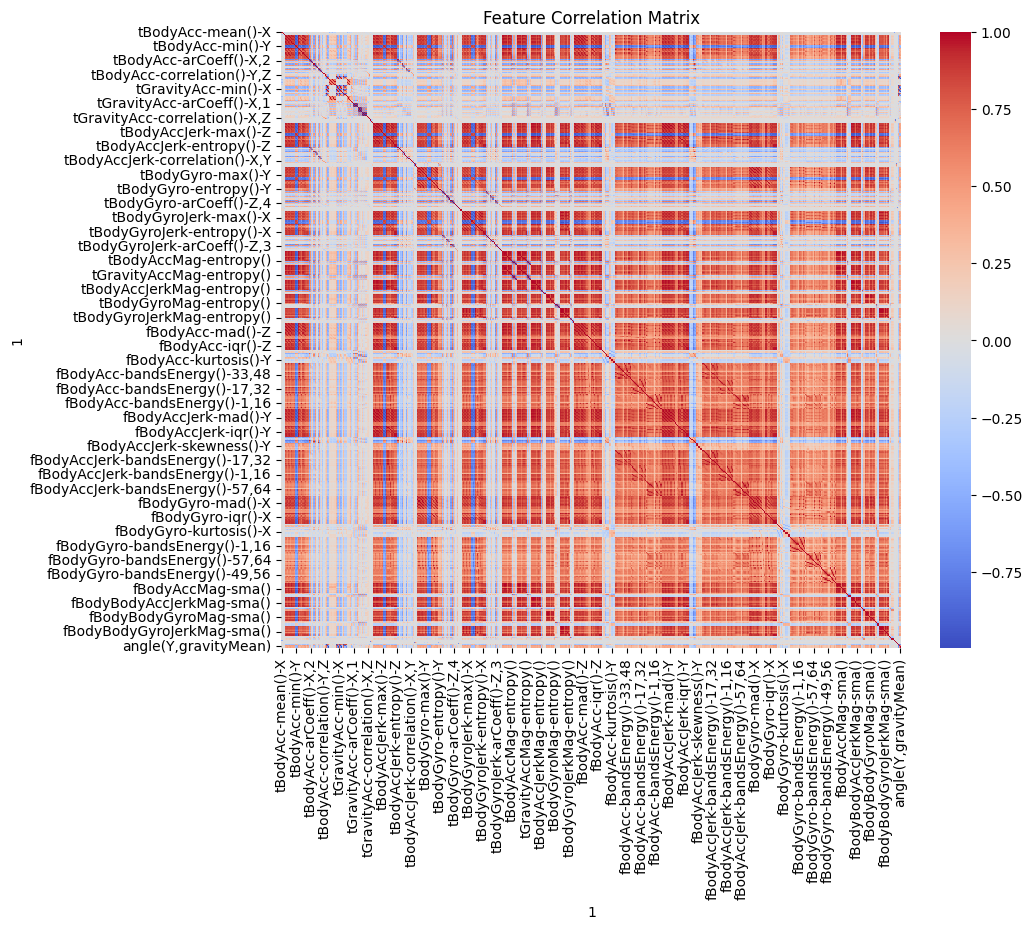

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# 创建热力图
plt.figure(figsize=(10, 8))
sns.heatmap(X_train.corr(), cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

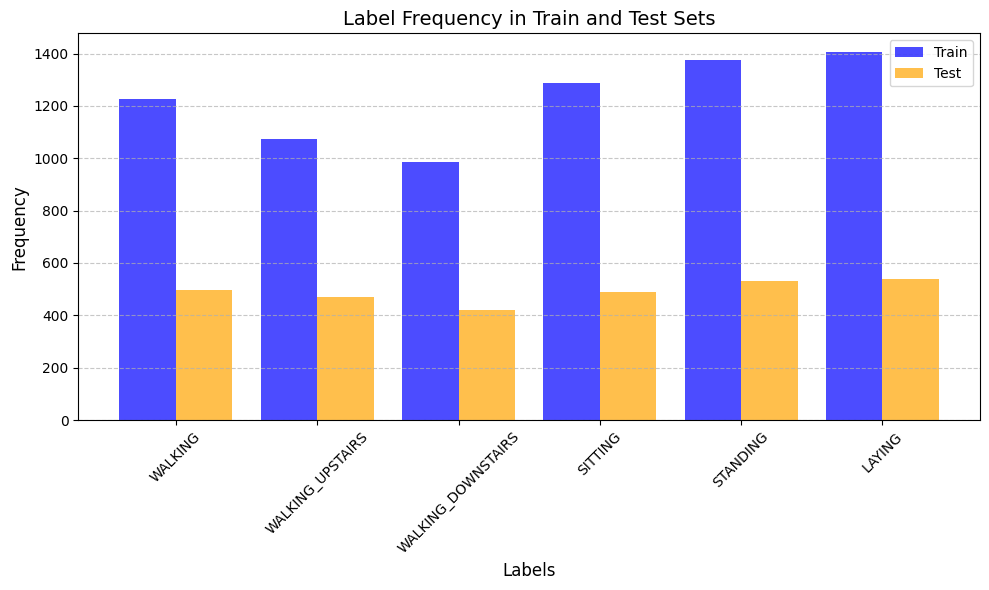

In [42]:
import matplotlib.pyplot as plt
import numpy as np

y_label = ['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'SITTING', 'STANDING', 'LAYING']
train_counts = y_train.value_counts().sort_index().values
test_counts = y_test.value_counts().sort_index().values

bar_width = 0.4
x = np.arange(len(y_label))

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - bar_width / 2, train_counts, bar_width, label='Train', color='blue', alpha=0.7)
ax.bar(x + bar_width / 2, test_counts, bar_width, label='Test', color='orange', alpha=0.7)
ax.set_xticks(x)
ax.set_xticklabels(y_label, fontsize=10, rotation=45)
ax.set_title('Label Frequency in Train and Test Sets', fontsize=14)
ax.set_xlabel('Labels', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.legend(fontsize=10)
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

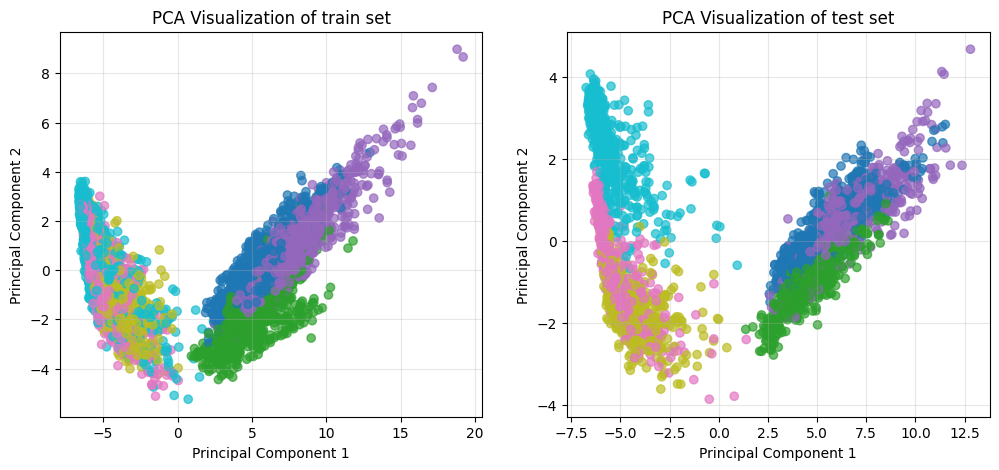

In [3]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
# 训练集
data_pca = pca.fit_transform(X_train)
axes[0].scatter(data_pca[:, 0], data_pca[:, 1], c=y_train.iloc[:, 0], cmap='tab10', alpha=0.7)
axes[0].set_title("PCA Visualization of train set")
axes[0].set_xlabel("Principal Component 1")
axes[0].set_ylabel("Principal Component 2")
axes[0].grid(alpha=0.3)

# 测试集
data_pca = pca.fit_transform(X_test)
axes[1].scatter(data_pca[:, 0], data_pca[:, 1], c=y_test.iloc[:, 0], cmap='tab10', alpha=0.7)
axes[1].set_title("PCA Visualization of test set")
axes[1].set_xlabel("Principal Component 1")
axes[1].set_ylabel("Principal Component 2")
axes[1].grid(alpha=0.3)
plt.show()

# 3. 聚类趋势（Hopkins Statistic）

In [ ]:
import numpy as np
from sklearn.neighbors import NearestNeighbors

def hopkins(X, sample_size=100):
    X = X_train.values
    sample_size = 100
    n_samples, n_features = X.shape
    random_indices = np.random.choice(n_samples, sample_size, replace=False)
    sample_points = X[random_indices]

    min_vals = np.min(X, axis=0)
    max_vals = np.max(X, axis=0)
    random_points = np.random.uniform(min_vals, max_vals, (sample_size, n_features))
    nbrs = NearestNeighbors(n_neighbors=2).fit(X)
    u_distances = nbrs.kneighbors(random_points)[0][:, 0]
    w_distances = nbrs.kneighbors(sample_points)[0][:, 1]
    H = np.sum(u_distances) / (np.sum(w_distances) + np.sum(u_distances))
    return H

print(f'train set hopkins statistic: {hopkins(X_train)}')
print(f'test set hopkins statistic: {hopkins(X_test)}')

train set hopkins statistic: 0.8475839766163674
test set hopkins statistic: 0.8554862400103497


H接近1，说明数据具有强聚类趋势

# 4. 聚类质量

In [ ]:
# 紧密度
import numpy as np
from sklearn.metrics import pairwise_distances
def compute_compactness(X, labels):
    X = X.values
    unique_labels = np.unique(labels)
    compactness = 0.0
    
    for label in unique_labels:
        cluster_points = X[labels == label]
        cluster_center = cluster_points.mean(axis=0)  # 计算质心
        compactness += np.sum(np.linalg.norm(cluster_points - cluster_center, axis=1))  # 簇内距离总和
    return compactness

# 分离度
def compute_separation(X, labels):
    X = X.values
    unique_labels = np.unique(labels)
    cluster_centers = []
    for label in unique_labels:
        cluster_points = X[labels == label]
        cluster_centers.append(cluster_points.mean(axis=0))  # 计算质心
    cluster_centers = np.array(cluster_centers)
    pairwise_dist = pairwise_distances(cluster_centers)  # 质心两两之间的距离
    np.fill_diagonal(pairwise_dist, np.inf)  # 忽略自身到自身的距离（置为无穷大）
    
    return pairwise_dist.min()

In [37]:
import numpy as np
a = np.ones((5, 2))
b = a.mean(axis=0)
c = a - b
np.sum(c ** 2)

0.0

# 5. 聚类模型

## 5.1 k-means

In [5]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, fowlkes_mallows_score, silhouette_score, calinski_harabasz_score, davies_bouldin_score
n_clusters = 6
n_components = .95
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=n_components)),
    ('kmeans', KMeans(n_clusters=n_clusters, random_state=42))
])
labels = pipeline.fit_predict(X_train)
print('dimension after pca:',  pipeline['pca'].n_components_)
true_labels = y_train.iloc[:, 0]

# 内在指标
print('Internal Indices')
# 紧凑度
compactness = compute_compactness(X_train, labels)
print(f'compactness:{compactness: .3f}')

# 分离度
separation = compute_separation(X_train, labels)
print(f'separation:{separation: .3f}')

# 衡量簇内点的紧密度与簇间点的分离度，取值范围：[-1, 1]，值越接近 1，说明聚类效果越好。
SC = silhouette_score(X_train, labels)  
print(f'Silhouette Coefficient:{SC: .3f}')

# 衡量簇间方差和簇内方差的比值，值越大，说明簇间分离度大，簇内紧密度高。
CH = calinski_harabasz_score(X_train, labels)  
print(f'Calinski-Harabasz Index:{CH: .3f}')

# 衡量簇间距离和簇内距离的比值，值越小，说明聚类效果越好
DB = davies_bouldin_score(X_train, labels) 
print(f'Davies-Bouldin Index:{DB: .3f}\n')


# 外在指标
print('External Indices:')
# 取值范围：[-1, 1]，值越接近 1，说明聚类结果与真实标签一致性越高。
ARI = adjusted_rand_score(true_labels, labels) 
print(f'Adjusted Rand Index:{ARI: .3f}')

#取值范围：[0, 1]，值越高说明聚类结果与真实标签一致性越高。
MI = normalized_mutual_info_score(true_labels, labels) 
print(f'Mutual Information:{MI: .3f}')

#取值范围：[0, 1]，值越高说明聚类结果与真实标签一致性越高。
FMI = fowlkes_mallows_score(true_labels, labels)
print(f'FMI:{FMI: .3f}')

c:\Users\62687\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\62687\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=29.
  warnings.warn(


dimension after pca: 102
Internal Indices
compactness: 30402.064
separation: 3.672
Silhouette Coefficient: 0.146
Calinski-Harabasz Index: 3055.201
Davies-Bouldin Index: 2.152

External Indices:
Adjusted Rand Index: 0.424
Mutual Information: 0.560
FMI: 0.532


## 5.2 基于密度的聚类

### 5.2.1 DBSCAN 
(Density-Based Spatial Clustering of Applications with Noise)

- 原理：
    - 定义一个点的邻域范围𝜖和最小点数min_samples。
    - 如果一个点的邻域范围内点的数量大于等于min_samples，则该点被认为是核心点，并与其邻域范围内的点形成一个簇。
    - 非核心点若在某核心点的邻域范围内，则归属于该簇；否则标记为噪声点。
- 优点：
    - 能发现任意形状的簇。
    - 对噪声点具有鲁棒性。
- 缺点：
    - 需要调节超参数 
    - 𝜖和min_samples，在不同数据集上较难优化。

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import ParameterGrid
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.8))
])
data_pca = pipeline.fit_transform(X_train)
param_grid = {
    'dbscan__eps': [5],  # 范围越大，越可能找到邻居，越不被判定为噪声点
    'dbscan__min_samples': [7, 8, 9, 10] # 数值越大，越严苛，越可能被判定为噪声点
}

best_score = -1
best_params = {}
for eps in param_grid['dbscan__eps']:
    for min_samples in param_grid['dbscan__min_samples']:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(data_pca)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        print(set(labels))
        print(f'n_clusters:{n_clusters}')
        if n_clusters == 6:
            best_params = {'eps': eps, 'min_samples': min_samples} 
# print("最佳参数：", best_params)
# print("最佳 ARI 评分：", best_score)


{0, 1, 2, 3, 4, 5, 6, -1}
n_clusters:7
{0, 1, 2, 3, 4, 5, -1}
n_clusters:6
{0, 1, 2, 3, 4, -1}
n_clusters:5
{0, 1, 2, 3, -1}
n_clusters:4


In [8]:
dbscan = DBSCAN(eps=8, min_samples=5)
labels = dbscan.fit_predict(data_pca)
pd.DataFrame(labels).value_counts()

: 

In [5]:
dbscan = DBSCAN(eps=5, min_samples=8)
labels = dbscan.fit_predict(data_pca)
pd.DataFrame(labels).value_counts()

-1    4985
 0    2301
 2      21
 4      13
 5      13
 1      12
 3       7
Name: count, dtype: int64

## 5.3 层次聚类

层次聚类需要计算簇之间的距离，以下是常见的距离度量方法：

- 单链接（Single Linkage）：两个簇中最近点之间的距离。
- 完全链接（Complete Linkage）：两个簇中最远点之间的距离。
- 平均链接（Average Linkage）：两个簇中所有点对之间距离的平均值。
- Ward’s 方法：通过最小化簇内平方误差（within-cluster variance）来合并簇。

### 5.3.1 聚合型层次聚类（Agglomerative Hierarchical Clustering）

- 原理：从每个数据点作为单独的簇开始，不断合并最近的簇，直到所有数据点合并为一个簇，形成层次结构。
- 优点：
简单直观，适用于小数据集。
- 缺点：
难以处理大规模数据集，计算复杂度较高。

In [22]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, fowlkes_mallows_score, silhouette_score, calinski_harabasz_score, davies_bouldin_score
model = AgglomerativeClustering(n_clusters=6, linkage='ward') #采用ward's方法计算簇间距离
labels = model.fit_predict(X_train)
true_labels = y_train.iloc[:, 0]
# 内在指标
print('Internal Indices')
# 紧凑度
compactness = compute_compactness(X_train, labels)
print(f'compactness:{compactness: .3f}')

# 分离度
separation = compute_separation(X_train, labels)
print(f'separation:{separation: .3f}')

# 衡量簇内点的紧密度与簇间点的分离度，取值范围：[-1, 1]，值越接近 1，说明聚类效果越好。
SC = silhouette_score(X_train, labels)  
print(f'Silhouette Coefficient:{SC: .3f}')

# 衡量簇间方差和簇内方差的比值，值越大，说明簇间分离度大，簇内紧密度高。
CH = calinski_harabasz_score(X_train, labels)  
print(f'Calinski-Harabasz Index:{CH: .3f}')

# 衡量簇间距离和簇内距离的比值，值越小，说明聚类效果越好
DB = davies_bouldin_score(X_train, labels) 
print(f'Davies-Bouldin Index:{DB: .3f}\n')


# 外在指标
print('External Indices:')
# 取值范围：[-1, 1]，值越接近 1，说明聚类结果与真实标签一致性越高。
ARI = adjusted_rand_score(true_labels, labels) 
print(f'Adjusted Rand Index:{ARI: .3f}')

#取值范围：[0, 1]，值越高说明聚类结果与真实标签一致性越高。
MI = normalized_mutual_info_score(true_labels, labels) 
print(f'Mutual Information:{MI: .3f}')

#取值范围：[0, 1]，值越高说明聚类结果与真实标签一致性越高。
FMI = fowlkes_mallows_score(true_labels, labels)
print(f'FMI:{FMI: .3f}')


Internal Indices
compactness: 30654.137
separation: 2.922
Silhouette Coefficient: 0.109
Calinski-Harabasz Index: 2941.243
Davies-Bouldin Index: 2.336

External Indices:
Adjusted Rand Index: 0.513
Mutual Information: 0.652
FMI: 0.601


AttributeError: 'AgglomerativeClustering' object has no attribute 'cluster_centers_'

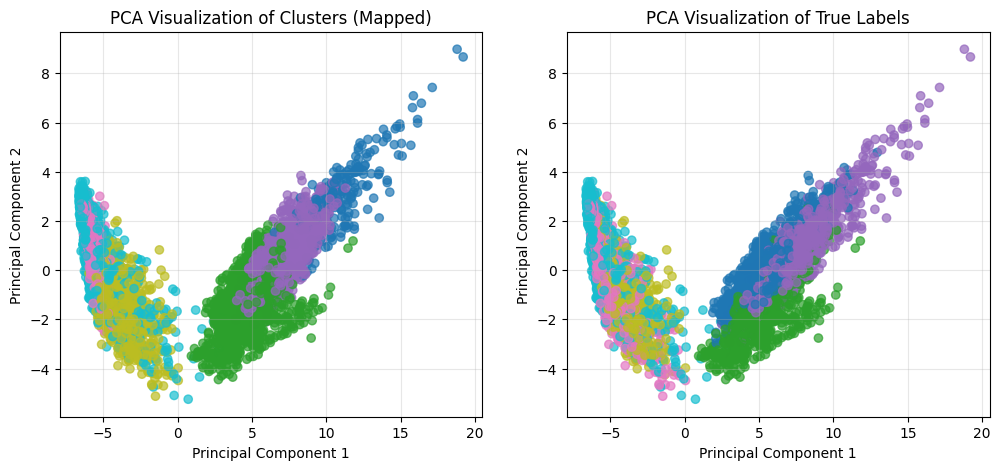

In [4]:
# 模型聚类 vs. 真实聚类
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from scipy.optimize import linear_sum_assignment

# 计算混淆矩阵 (用于匹配聚类和真实标签)
contingency_matrix = confusion_matrix(y_train.iloc[:, 0], labels + 1)
# 找到最佳匹配 (匈牙利算法)
row_ind, col_ind = linear_sum_assignment(-contingency_matrix)
# 创建映射字典
mapping = {col: row for row, col in zip(row_ind, col_ind)}
# 重新映射模型的聚类标签
mapped_labels = np.array([mapping[label] for label in labels])

pca = PCA(n_components=2)
data_pca = pca.fit_transform(X_train)

# 模型聚类
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].scatter(data_pca[:, 0], data_pca[:, 1], c=mapped_labels, cmap='tab10', alpha=0.7)
axes[0].set_title("PCA Visualization of Clusters (Mapped)")
axes[0].set_xlabel("Principal Component 1")
axes[0].set_ylabel("Principal Component 2")
axes[0].grid(alpha=0.3)
# 真实聚类
axes[1].scatter(data_pca[:, 0], data_pca[:, 1], c=y_train.iloc[:, 0], cmap='tab10', alpha=0.7)

axes[1].set_title("PCA Visualization of True Labels")
axes[1].set_xlabel("Principal Component 1")
axes[1].set_ylabel("Principal Component 2")
axes[1].grid(alpha=0.3)

plt.show()

In [5]:
contingency_matrix

array([[   0,  710,  489,    0,    0,   27],
       [   0,  841,  232,    0,    0,    0],
       [   0,   62,  733,    0,    0,  191],
       [   8,    1,    0,  508,  769,    0],
       [   0,    0,    0,  687,  687,    0],
       [1403,    0,    0,    0,    4,    0]], dtype=int64)

### 5.3.2 分裂型层次聚类 (Divisive Hierarchical Clustering)

- 原理：从所有数据点作为一个簇开始，不断将簇分裂为更小的簇，直到每个数据点成为一个单独的簇。
- 优点：可根据需要选择合适的分裂策略。
- 缺点：较少用于实际应用，计算复杂度高。

In [23]:
from sklearn.cluster import KMeans
import numpy as np

def divisive_clustering(X, n_clusters):
    # 初始时所有点属于同一个簇
    clusters = [X]
    labels = np.zeros(len(X), dtype=int)
    current_label = 1

    while len(clusters) < n_clusters:
        # 找到最大簇进行分裂
        largest_cluster_idx = np.argmax([len(cluster) for cluster in clusters])
        largest_cluster = clusters.pop(largest_cluster_idx)

        # 使用 K-Means 将该簇分裂为 2 个子簇
        kmeans = KMeans(n_clusters=2, random_state=42).fit(largest_cluster)
        sub_labels = kmeans.labels_

        # 更新簇和标签
        for i in range(2):
            clusters.append(largest_cluster[sub_labels == i])
            labels[np.isin(X, largest_cluster[sub_labels == i]).all(axis=1)] = current_label
            current_label += 1

    return labels

# 执行分裂型聚类
labels = divisive_clustering(X_train, n_clusters=6)
true_labels = y_train.iloc[:, 0]
# 内在指标
print('Internal Indices')
# 紧凑度
compactness = compute_compactness(X_train, labels)
print(f'compactness:{compactness: .3f}')

# 分离度
separation = compute_separation(X_train, labels)
print(f'separation:{separation: .3f}')

# 衡量簇内点的紧密度与簇间点的分离度，取值范围：[-1, 1]，值越接近 1，说明聚类效果越好。
SC = silhouette_score(X_train, labels)  
print(f'Silhouette Coefficient:{SC: .3f}')

# 衡量簇间方差和簇内方差的比值，值越大，说明簇间分离度大，簇内紧密度高。
CH = calinski_harabasz_score(X_train, labels)  
print(f'Calinski-Harabasz Index:{CH: .3f}')

# 衡量簇间距离和簇内距离的比值，值越小，说明聚类效果越好
DB = davies_bouldin_score(X_train, labels) 
print(f'Davies-Bouldin Index:{DB: .3f}\n')


# 外在指标
print('External Indices:')
# 取值范围：[-1, 1]，值越接近 1，说明聚类结果与真实标签一致性越高。
ARI = adjusted_rand_score(true_labels, labels) 
print(f'Adjusted Rand Index:{ARI: .3f}')

#取值范围：[0, 1]，值越高说明聚类结果与真实标签一致性越高。
MI = normalized_mutual_info_score(true_labels, labels) 
print(f'Mutual Information:{MI: .3f}')

#取值范围：[0, 1]，值越高说明聚类结果与真实标签一致性越高。
FMI = fowlkes_mallows_score(true_labels, labels)
print(f'FMI:{FMI: .3f}')

c:\Users\62687\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\62687\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=29.
  warnings.warn(
c:\Users\62687\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\62687\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environm

Internal Indices
compactness: 30230.425
separation: 2.697
Silhouette Coefficient: 0.101
Calinski-Harabasz Index: 3036.367
Davies-Bouldin Index: 2.452

External Indices:
Adjusted Rand Index: 0.502
Mutual Information: 0.616
FMI: 0.587


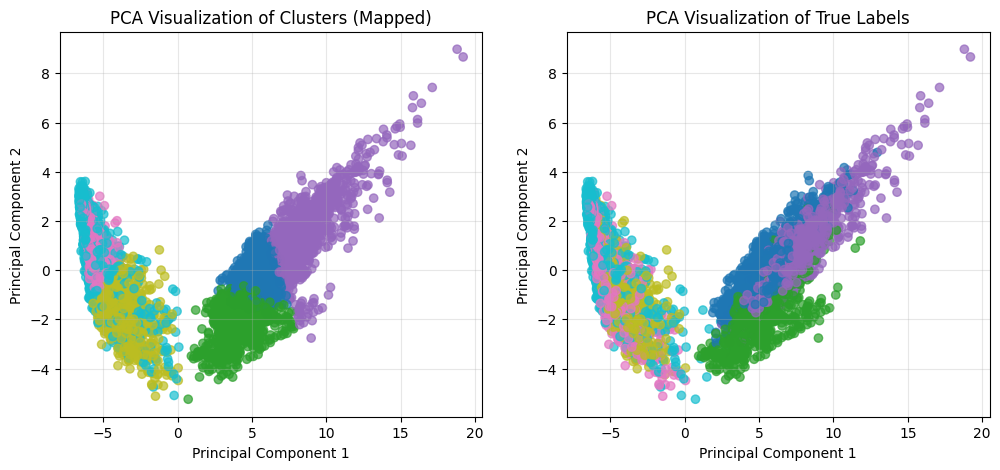

In [33]:
# 模型聚类 vs. 真实聚类
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from scipy.optimize import linear_sum_assignment

# 计算混淆矩阵 (用于匹配聚类和真实标签)
mapping0 = {label: i for i, label in enumerate(set(labels))}
labels = np.array([mapping0[label] for label in labels])
contingency_matrix = confusion_matrix(y_train.iloc[:, 0], labels)
# 找到最佳匹配 (匈牙利算法)
row_ind, col_ind = linear_sum_assignment(-contingency_matrix)
# 创建映射字典
mapping = {col: row for row, col in zip(row_ind, col_ind)}
# 重新映射模型的聚类标签
mapped_labels = np.array([mapping[label] for label in labels])

pca = PCA(n_components=2)
data_pca = pca.fit_transform(X_train)

# 模型聚类
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].scatter(data_pca[:, 0], data_pca[:, 1], c=mapped_labels, cmap='tab10', alpha=0.7)
axes[0].set_title("PCA Visualization of Clusters (Mapped)")
axes[0].set_xlabel("Principal Component 1")
axes[0].set_ylabel("Principal Component 2")
axes[0].grid(alpha=0.3)
# 真实聚类
axes[1].scatter(data_pca[:, 0], data_pca[:, 1], c=y_train.iloc[:, 0], cmap='tab10', alpha=0.7)

axes[1].set_title("PCA Visualization of True Labels")
axes[1].set_xlabel("Principal Component 1")
axes[1].set_ylabel("Principal Component 2")
axes[1].grid(alpha=0.3)

plt.show()